![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction 

In this task we will be looking at different type of confident interval and see how to do  confidence  interval using python which is extension from one of our <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.gee6dfd142e_0_192">slide</a>

## What will we accomplish?

By the end of the notebook we will be able to :
1. Know different type of confidence interval
2. How and when to use the different confidence interval
3. Use the formulas of the confidence interval

## Notebook Content
* [Part 1 :Proportion Population confidence Interval](#proportion)
    * [Confidence Interval for female population proportion that has heart disease.](#femaleproportion)
    * [Confidence Interval for difference in population proportion.](#diffpropotion)
* [Part 2 :Population Mean Confidence Interval](#meaninterval)
    * [Confidence of the female cholesterol level mean.](#femalemeaninterval)
    * [Confidence Interval for difference in population mean.](#diffmeaninterval)
    * [Using bootstrap method to get confidence Interval for difference in population mean.](#bootstrap)
* [Summary](#Summary)
* [Contributors](#Contributors)
* [Reference](#Reference)

We will be using mainly pandas and numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset can be downloaded at https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [2]:
df = pd.read_csv('../data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In this datasets there is few things that we must understand. The most important on is the **"target"** column. **Target** column is the presence of heart disease , which mean if it is 0 there is no heart disease and 1 is the person have heart disease which will be our dichotomous variable. The other important column that we need to know is the **"chol"** column which so the level of  cholesterol of the patient and this is the continuous variable that we will be using for out mean confidence interval.The last important is the **"sex"** column which 1 = male and 0 = female . 

<a name="proportion"><h3><b>Proportion Population Confident Interval 

We create the population proportion data frame which is person with the heart disease and differentiated by gender

In [3]:
df['gender'] = df.sex.replace({1: "Male", 0: "Female"})

Drop all not available data

In [4]:
data = df[["target", "gender"]].dropna()

In [5]:
pd.crosstab(data.target, data.gender)

gender,Female,Male
target,,
0,86,413
1,226,300


Here we can view in general the distribution of the data. Later in the notebook we will be focusing on female heart diseases presence.

<a name="femaleproportion"><h4><b>Confidence Interval for female population proportion that has heart disease.

Before we continue we will be looking at the overall formula for the proportion population confidence interval. From the <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.geee1b814d6_0_32">learning material</a>. Below is the important part from the slide:  

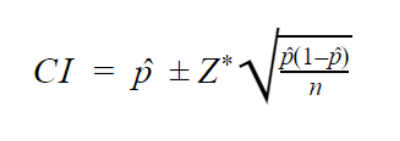

The formula above is the confidence interval formula for proportion population where:

* **ˆp** = the proportion of the female that have heart disease
* **Z**= the critical value of the z-distribution (in our case we use 95% which is 1.96)
* **n**= the total number of female 



Here we start the first part of the formula where we gather all the variable which is **^p** and**n**. Since **^p** is the proportion of the female that have heart disease, we will need to divide the number of female that have heart disease with the total number of female. But before that we will get the **n** which is the total number of female which we will add both female with heart disease with female with no heart disease. All the value we already have from the upper part of the notebook

If compared to the formula , the variable **"f_propotion"** = **^p** and **"f"** = **n**

In [6]:
f = 86+226
f_propotion = 226/(f)

The we proceed to completing the other portion of the formula which is the square root part of the formula which is called standard error, here we name the portion **"se_female"**. 

In [7]:
se_female = np.sqrt(f_propotion * (1 - f_propotion) / f)
se_female

0.02529714756803247

Lastly we will complete the formula and use **lower_interval_FP** as the lower interval for our 95% confident level and **upper_interval_FP** is the upper interval.

Get the 95% confidence level ( the z_score is 1.96 which is available in the table) and use the formula get the interval

In [8]:
z_score = 1.96

lower_interval_FP = f_propotion - z_score * se_female
upper_interval_FP = f_propotion + z_score * se_female

(lower_interval_FP, upper_interval_FP)

(0.6747765651256307, 0.773941383592318)

From the result, the female having heart disease, the lower and upper bounds of the 95% confidence interval are 0.675 and 0.774.

There is multiple method on getting the 95% confidence score and using the **stasmodels** is on of them

In [9]:
import statsmodels.api as sm
sm.stats.proportion_confint(f * f_propotion, f)

(0.6747774762140357, 0.773940472503913)

We can observe that the result from both calculating using formula and using **statsmodels** have the same interval for 95% confident level which is (0.6747774762140357, 0.773940472503913) 

<a name="diffpropotion"><h4><b>Confidence Interval for difference in population propotion 

In the next part we will continue the proportion population but now we will take the difference between male and female that have heart diseases. There is nothing new here beside do a little manipulation on how we get the variable for the formula above. In general we will need the standard error of the female and male that have the heart disease and that will be our new standard error that we will be using in the formula. Then we will need to get the difference in proportion of female and male that have the heart disease which will be our new proportion sample.

Here we first get the male proportion with heart disease

In [10]:
m = 399+413
m_propotion = 399/(m)

Get the standard error of the male proportion that have heart disease ( see the Confidence interval for proportions
formula )

In [11]:
se_male = np.sqrt(m_propotion * (1 - m_propotion) / m)
se_male

0.01754395197423383

Get the difference in standard error between the female and male  

In [12]:
se_diff = np.sqrt(se_female**2 + se_male**2)

Get the proportion difference

In [13]:
d_propotion = f_propotion - m_propotion

The upper and lower interval of the difference

In [14]:
lower_interval_DP = d_propotion - z_score * se_diff
upper_interval_DP = d_propotion + z_score * se_diff

(lower_interval_DP, upper_interval_DP)

(0.17264043686346828, 0.29331889116482524)

For the gender difference having heart disease: the lower and upper bounds of the 95% confidence interval are 0.173 and 0.293.


<a name="meaninterval"><h3><b>Population Mean Confidence Interval</b></h3></a>

Population mean confidence interval is another aspect of confidence interval where we deal with the continuous data to get the data confidence interval. For our exercise we will use the cholesterol level in gender as our data. Before we start, we will understand the formula of the confidence interval which is from the <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.gf03c99aad1_5_50">slide</a>:

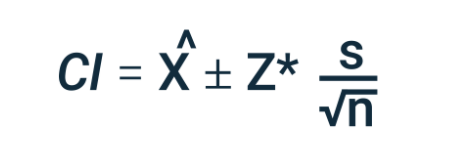

From the formula above: 

* **ˆx** = the sample mean of  cholesterol level
* **s** = the sample standard deviation/error of  cholesterol level

    
<a name="femalemeaninterval"><h4><b>Confidence of the female cholesterol level mean</b></h4></a>

Before we start we will first get the detail of the cholesterol level , and view it by sex as we will be focusing on the female cholesterol level. 

Here we get the mean ,size and standard deviation of level of cholesterol between gender

In [15]:
df.groupby("gender").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

The detail of the data is everything we need to fill up the formula.

Get the needed data for the mean confidence interval ( see the formula of the Confidence interval for the mean of normally-distributed data)

We are using 95% confident interval which is z = 1.96

In [16]:
z = 1.96
mean_f = 261.455128
sd_f = 64.466781
n_f = 312

Then we will get the standard error of the female  cholesterol level which is as described as the equation above

To make it clear here is the formula for the standard error:
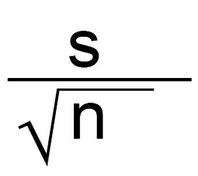

In [17]:
se_f = sd_f / np.sqrt(n_f)

Get the intervals for 95% confidence level which using z as 1.96 and using the formula mentioned above.

In [18]:
lower_interval_FM = mean_f - z * se_f
upper_interval_FM = mean_f + z * se_f
(lower_interval_FM, upper_interval_FM)

(254.30169095203016, 268.6085650479699)

For the female cholesterol level: the lower and upper bounds of the 95% confidence interval are 254.302 and 268.609.

<a name="diffmeaninterval"><h4><b>Confidence Interval for difference in population mean </b></h4></a>

Next we will do comparison of the  cholesterol level for male and female and get the confidence level of the comparison. There are not much difference in formula but we need to get the right variable to insert to the formula. First we will need the mean difference of the female and male data which will become our **^X** and the difference in standard error.

Get the needed data from above for male population

In [19]:
mean_m = 239.237027
sd_m = 43.155535
n_m = 713
se_m = sd_m / np.sqrt(n_m)

Find the standard error using the unpooled approach ( we use the unpooled because the variance between male and women not the same )( see the standard deviation to estimate the variance) 

Here is a quick view on the standard error using unpooled approach:
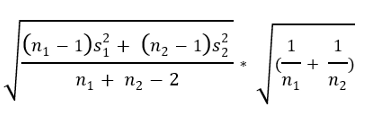
where :
* **n1** is the total number female (n_f)
* **n2** is the total number of male (n_m)
* **s1** is standard error for female (se_f)
* **s2** is standard error for male (se_m)

In [20]:
mean_d = mean_f - mean_m

se_d = (np.sqrt(
    (n_f-1)*se_f**2 + (n_m-1)*se_m**2)/(n_f+n_m-2))*(np.sqrt(1/n_f + 1/n_m))

Calculate the interval difference 

In [21]:
lower_interval_DM = mean_d - 1.96*se_d
upper_interval_DM = mean_d + 1.96*se_d
(lower_interval_DM, upper_interval_DM)

(22.20802509671433, 22.22817690328565)

From the result we can see the confidence interval for mean difference  of male and female cholesterol level for 95% confidence level is from 22.20802509671433 to 22.22817690328565 

<a name="bootstrap"><h4><b>Using bootstrap method to get confidence Interval for difference in population mean </b></h4></a>

In this part we will be using <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.gee6dfd142e_0_9">bootstrap method</a> to get the confident interval for difference in population mean. 

A brief explanation. We will for 1000 random sample of the  cholesterol data and from that data we will get the mean difference between male and female and from the 1000 mean difference we will get the 95% confident interval.

First we will get the needed data in a dataframe.

In [22]:
df_1 = df[["chol", "sex"]]
bootstrap_sample_size = len(df_1)

Then we will get the 1000 mean difference (any number is possible) and this is done by resampling the dataframe and get the mean difference between female and male cholesterol level. Then we insert the mean difference in our array. This is repeated for 1000 times

In [23]:
mean_diffs = []
for i in range(1000):
    bootstrap_sample = df_1.sample(
        n=bootstrap_sample_size, replace=True, random_state=None)
    mean_diff = bootstrap_sample.groupby("sex").mean().iloc[0, 0]
    - bootstrap_sample.groupby("sex").mean().iloc[1, 0]
    mean_diffs.append(mean_diff)

From the mean difference array , we will get the 95% confidence level using the np.percentile function. From the distribution graph we know to get the 95% confidence level interval the starting level will be at the 2.5 % percentile and the end will be at 97.5% percentile.

In [24]:
left = np.percentile(mean_diffs, 2.5)
right = np.percentile(mean_diffs, 97.5)
print(left, right)

254.65829382929644 268.6537918401771


Here is the graphical view of the 95% confidence interval. From the histogram, we can conclude 95% of the time our data will always be in the red area.

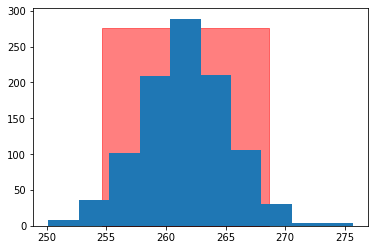

In [25]:
plt.hist(mean_diffs, bins=10)
plt.fill_betweenx([0, max(mean_diffs)], left, right, color='r', alpha=0.5)
plt.show()

## <a name="Summary">Summary 
From this tutorial, you should have learned:

1. How to get the confidence interval for proportion population and mean population.
2. How to get the confidence interval for difference in proportion and mean population.    
2. How to get the confidence interval for difference in mean population using bootstrapping method <br>

Congratulations, that concludes this lesson.<br>



## <a name="Contributors">Contributors
**Author**<br>
[Muhammad Azhar](muhammad.azhar@skymind.my)


## <a name="Reference">Reference
1. [Statistics and Hypothesis Testing ](https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.g71816a2232_0_5)
2. [Guide to Confident Interval](https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593)    
3. [Bootstrap Confidence Intervals](https://medium.com/@wenjun.sarah.sun/bootstrap-confidence-interval-in-python-3fe8d5a6fd56)